In [1]:
import pandas as pd 
import numpy as np

# 可视化
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode 
import pyecharts.options as opts

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.rcParams['font.sans-serif']=['SimHei']   # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False     # 用来正常显示负号
matplotlib.rc("font",family='Heiti TC')

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('./data/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()
# https://github.com/HuichuanLI/Data-Analyse/blob/2a3acc0d04cfb561d44f96b2e0f545cc6b0d82b7/%E5%A2%A8%E8%A5%BF%E5%93%A5%E4%BA%BA%E8%82%A5%E8%83%96%E7%A8%8B%E5%BA%A6%E6%95%B0%E6%8D%AE%E5%8F%AF%E8%A7%86%E5%8C%96%E5%88%86%E6%9E%90/%E5%A2%A8%E8%A5%BF%E5%93%A5%E4%BA%BA%E8%82%A5%E8%83%96%E7%A8%8B%E5%BA%A6%E6%95%B0%E6%8D%AE%E5%8F%AF%E8%A7%86%E5%8C%96%E5%88%86%E6%9E%90.ipynb

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   float64
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   float64
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   float64
 12  SCC                             21

In [6]:
data.describe(include='all')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.00000,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,NaN,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,1056.00000,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,609.53753,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,1.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,528.50000,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,1056.00000,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,1583.50000,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [7]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1056.00000,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,609.53753,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,1.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,528.50000,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,1056.00000,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,1583.50000,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,2111.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
family_yes = data[data['family_history_with_overweight']=='yes']['family_history_with_overweight'].count()
family_no = data['family_history_with_overweight'].count() - family_yes

high_cal_yes = data[data['FAVC']=='yes']['FAVC'].count()
high_cal_no = data['FAVC'].count() - high_cal_yes

smo_cal_yes = data[data['SMOKE']=='yes']['SMOKE'].count()
smo_cal_no = data['SMOKE'].count() - smo_cal_yes

test_cal_yes = data[data['SCC']=='yes']['SCC'].count()
test_cal_no = data['SCC'].count() - test_cal_yes

In [11]:
high_cal_yes

1866

In [15]:
test_cal_yes

96

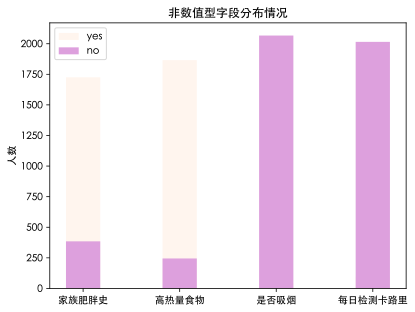

In [13]:
answer = ['yes', 'no']
labels = ['家族肥胖史','高热量食物','是否吸烟','每日检测卡路里']
yes_lable = [family_yes, high_cal_yes, smo_cal_yes, test_cal_yes]
no_lable = [family_no, high_cal_no, smo_cal_no, test_cal_no]


width = 0.355    

fig, ax = plt.subplots()

ax.bar(labels, yes_lable, width, label='yes',color = 'seashell')
ax.bar(labels, no_lable, width, label='no',color = 'plum')

ax.set_ylabel('人数')
ax.set_title('非数值型字段分布情况')
ax.legend()

plt.show()

In [16]:
data['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [17]:
c = (
    Pie()
    .add(
        "", 
        [list(z) for z in zip(['Sometimes', 'no', 'Frequently', 'Always'], data['CALC'].value_counts().tolist())],
        radius=["30%", "45%"],
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .set_global_opts(tooltip_opts =opts.TooltipOpts(formatter=" {a} </br> {b} {d}%",axis_pointer_type = "cross",),legend_opts =opts.LegendOpts(type_='scroll',orient='vertical',pos_left="5%",pos_top= 'middle'),title_opts=opts.TitleOpts(title="喝酒频率分布图",pos_left="center"))                     
    
)
c.render_notebook()

In [18]:
list1 = [data[data['CALC']=='Sometimes']['CALC'].count(), data[data['CAEC']=='Sometimes']['CAEC'].count()]
list2 = [data[data['CALC']=='no']['CALC'].count(), data[data['CAEC']=='no']['CAEC'].count()]
list3 = [data[data['CALC']=='Frequently']['CALC'].count(), data[data['CAEC']=='Frequently']['CAEC'].count()]
list4 = [data[data['CALC']=='Always']['CALC'].count(), data[data['CAEC']=='Always']['CAEC'].count()]
print(list1)
print(list2)
print(list3)
print(list4)

[1401, 1765]
[639, 51]
[70, 242]
[1, 53]


In [19]:
from pyecharts.charts import Bar

d = (
    Bar()
    .add_xaxis(['喝酒频率','两餐之间进食情况'])
    .add_yaxis('偶尔', [1401, 1765], stack="stack1")
    .add_yaxis("从不", [639, 51], stack="stack2")
    .add_yaxis("总是", [70, 242], stack="stack3")
    .add_yaxis("经常", [1, 53], stack="stack4")
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .set_colors(["#d65f5f","#8c613c","#dc7ec0","#797979"])
    .set_global_opts(tooltip_opts =opts.TooltipOpts(axis_pointer_type = "cross",),legend_opts =opts.LegendOpts(type_='scroll',orient='vertical',pos_right="5%",pos_top= 'middle'),title_opts=opts.TitleOpts(title="饮酒频率 & 两餐进食情况",pos_left="center"))                     
)
d.render_notebook()

In [27]:
data.info()
data.columns[[1,2,3,4,7,8,11,13,14]].tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   float64
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   float64
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   float64
 12  SCC                             21

['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

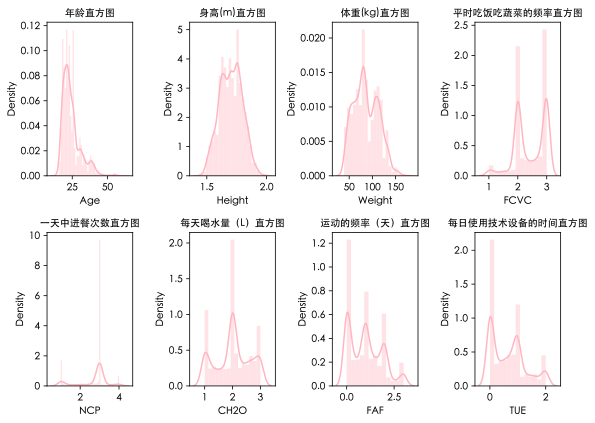

In [28]:
col1 = data.columns[[2,3,4,7,8,11,13,14]].tolist()
fig,ax = plt.subplots(2,4,figsize = (8,6))
column_name = ['年龄','身高(m)','体重(kg)','平时吃饭吃蔬菜的频率','一天中进餐次数','每天喝水量（L）','运动的频率（天）','每日使用技术设备的时间']

j=0
for i in range(0,len(col1)):
    plt.subplot(int('24'+str(i+1)))
    x = data[col1[i]]
    sns.distplot(x,color = 'lightpink')
    tit=column_name[j]
    j = j+1
    plt.title(tit+'直方图',size=10)

plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Text(0.5, 1.0, '数值型字段热力图')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

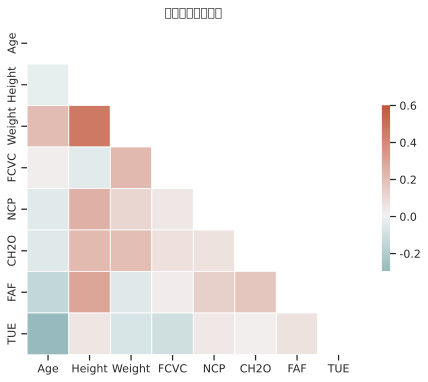

In [46]:
# sns.set_theme(style="white",font_scale=0.8)

d = pd.DataFrame(data=data,
                 columns=data.columns)

del d['id']
d['Gender'].head()
corr = d.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
ax.set_title('数值型字段热力图')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

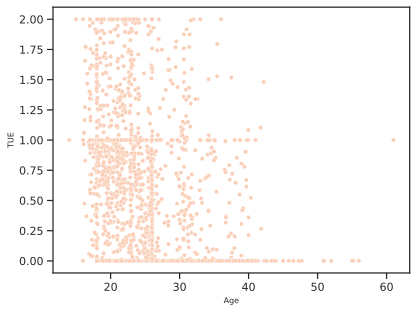

In [47]:
sns.scatterplot(data=data, x=data['Age'], y=data['TUE'],size =8,color = "#faceb6",legend = False)

plt.xlabel('Age', fontsize=8)
plt.ylabel('TUE', fontsize=8)

plt.show()

In [48]:
# 查看不同的肥胖程度等级
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [50]:
data[data['Gender']=='Female'].groupby(['NObeyesdad']).size().tolist()


[173, 141, 156, 2, 323, 145, 103]

In [51]:
# 女性中中`NObeyesdad`分布数据
female_type = ['正常', '超重I', '超重II',
       '肥胖I', '体重不足', '肥胖II',
       '肥胖III']
female_data = data[data['Gender']=='Female'].groupby(['NObeyesdad']).size().tolist()
# 男性中中`NObeyesdad`分布数据
male_type = ['正常', '超重I', '超重II',
       '肥胖I', '体重不足', '肥胖II',
       '肥胖III']
male_type.reverse()
male_data = data[data['Gender']=='Male'].groupby(['NObeyesdad']).size().tolist()
male_data.reverse()

# 数据赋值 之 内部 饼图
inner_x_data = ["女性", "男性"]
inner_y_data = data.groupby(['Gender']).size().tolist()
inner_data_pair = [list(z) for z in zip(inner_x_data, inner_y_data)]
# 数据赋值 之 外部 饼图
outer_x_data = female_type + male_type
outer_y_data = female_data + male_data
outer_data_pair = [list(z) for z in zip(outer_x_data, outer_y_data)]

# 参数配置
(
    Pie(init_opts=opts.InitOpts())
    .add(
        series_name="性别:",
        data_pair=inner_data_pair,
        radius=[0, "30%"],        # 饼图半径大小范围
        center=["45%","55%"],     # 饼图圆心相对位置
        label_opts=opts.LabelOpts(position="inner",formatter="{b} \n\n {d}%"),
        rosetype = ['radius']     # 展示成南丁格尔图
        
    )    
    .add(
        series_name="肥胖程度:",
        data_pair=outer_data_pair,
        radius=["31%","50%"],
        center=["45%","55%"],
        label_opts=opts.LabelOpts(position="outer"),
        rosetype = ['radius']     # 展示成南丁格尔图
    )
    # 设置颜色，为了更加直观，颜色数量等同 legend数量
    .set_colors(['#44a0d6',"#fc7716","#74c476","#9e9ac8","#4c72b0","#ee854a","#6acc64","#d65f5f","#8c613c","#dc7ec0","#797979","#d5bb67","#82c6e2","#faceb6","#fae9b6","#e3fab6","#b6faf6","#d6b6fa"])
    .set_global_opts(tooltip_opts =opts.TooltipOpts(formatter=" {a} </br> {b} {d}%",axis_pointer_type = "cross",),legend_opts =opts.LegendOpts(type_='scroll',orient='vertical',pos_left="5%",pos_top= 'middle'),title_opts=opts.TitleOpts(title="性别 & 肥胖程度",pos_left="center"))                     
    .render_notebook()
)


In [52]:
data.groupby(['Gender','NObeyesdad']).size().reset_index().sort_values(0, ascending=False)


,Gender,NObeyesdad,0
4,Female,Obesity_Type_III,323
10,Male,Obesity_Type_II,295
9,Male,Obesity_Type_I,195
13,Male,Overweight_Level_II,187
0,Female,Insufficient_Weight,173
2,Female,Obesity_Type_I,156
8,Male,Normal_Weight,146
5,Female,Overweight_Level_I,145
12,Male,Overweight_Level_I,145
1,Female,Normal_Weight,141


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

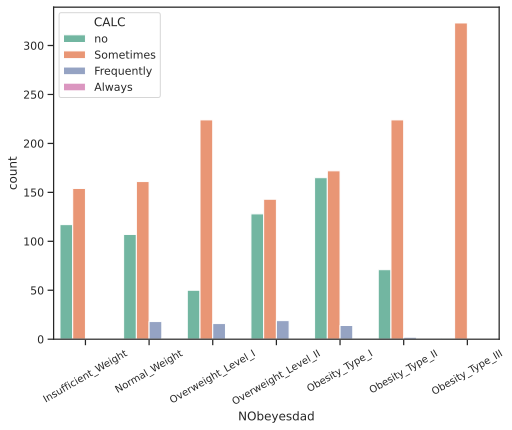

In [53]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='NObeyesdad',order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III'],hue='CALC',data=data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,size = 10) 
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

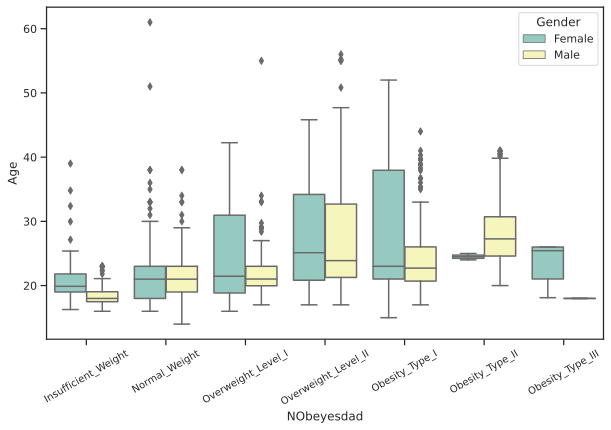

In [54]:
plt.figure(figsize=(10,6))

ax = sns.boxplot(x=data['NObeyesdad'],order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III'],y=data['Age'],hue=data['Gender'],palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,size = 10) 
# plt.title('不同肥胖程度人群年龄分布')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

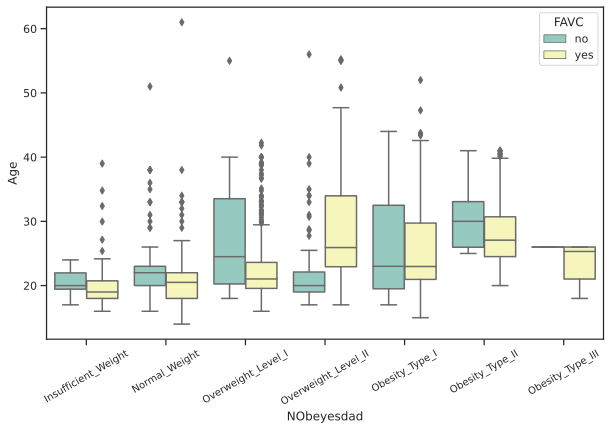

In [55]:
plt.figure(figsize=(10,6))

ax = sns.boxplot(x=data['NObeyesdad'],order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III'],y=data['Age'],hue=data['FAVC'],palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,size = 10) 
# plt.title('不同肥胖程度人群年龄分布')
plt.show()